In [1]:
import networkx as nx, matplotlib.pyplot as plt
import numpy as np, pandas as pd
import math, seaborn as sns
from scipy import stats
from sklearn import cluster as clstr
from networkx import edge_betweenness_centrality
from networkx.algorithms import community
import itertools

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df1 = pd.read_csv('C:/Users/saich/OneDrive/Desktop/SNA/project/marvel_characters.csv')
df2 = pd.read_csv('C:/Users/saich/OneDrive/Desktop/SNA/project/marvel_titles.csv')

In [3]:
GT = nx.Graph()
new_G = nx.Graph()
#GT.add_nodes_from(df['character'].tolist(),bipartite=1,node_color='w',alpha=0.4,node_shape='d')

for index, row in df2.iterrows():
  GT.add_node(row['title'] + '*', bipartite=0, media_type=row['type'], release_year=row['release_year'], release_month=row['release_month'], release_day=row['release_day'], rating=row['rating'], length=row['length'], starts=row['stars'], genres=row['genres'])

In [4]:
for index, row in df1.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  GT.add_node(char_name, bipartite=1, alias=row['character_alias'], actor=row['actor'])

for index, row in df1.iterrows():
  if row['title'] == 'What If...?':
    char_name = row['character'] + '-AR'
  else:
    char_name = row['character']
  GT.add_edge(row['title'] + '*', char_name)

In [5]:
character_nodes = {n for n, d in GT.nodes(data=True) if d['bipartite'] == 1}
title_nodes = set(GT) - character_nodes 

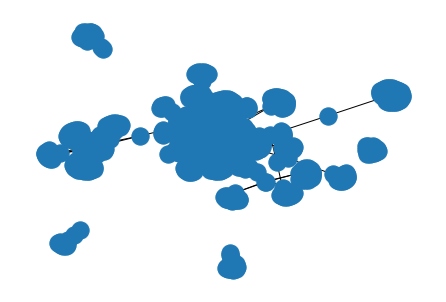

In [6]:
nx.draw(GT)

In [7]:
def deg_dst(G7): # degree distribution of titles and characters
    degrees = [G7.degree(n) for n in title_nodes]
    deg,freq = np.unique(degrees,return_counts=True)
    plt.plot(deg,freq,label = 'title degree distribution')
    plt.legend()
    plt.show()
    degrees1 = [G7.degree(n) for n in character_nodes]
    deg1,freq1 = np.unique(degrees1,return_counts=True)
    plt.plot(deg1,freq1,label = 'characters degree distribution')
    plt.legend()
    plt.show()
def avg_deg_cc(G): # average degree and clustering co-efficient
    avg_cc_G = nx.transitivity(G)
    avg_deg_G = G.degree()
    deg_sum_G =0
    for j in list(avg_deg_G):
        deg_sum_G += j[1]
    avg_deg_G =  deg_sum_G/len(G.nodes())
    return (avg_deg_G, avg_cc_G)

In [8]:
def deg_dst_Graph(G7):
    degrees = [G7.degree(n) for n in G7.nodes()]
    deg,freq = np.unique(degrees,return_counts=True)
    plt.plot(deg,freq,label = 'Total nodes degree distribution')
    plt.legend()
    plt.show()

###  Bi-partite Graph

In [9]:
#copying the graph
G_new = nx.bipartite.projected_graph(GT,character_nodes)
print(G_new)

Graph with 794 nodes and 14793 edges


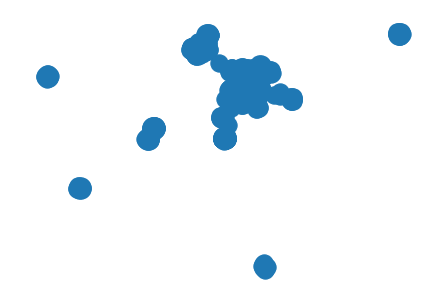

In [10]:
nx.draw(G_new)

In [11]:
avg_deg_new, avg_clstrng_new = avg_deg_cc(G_new) 
num = 0 
for c in nx.connected_components(G_new):
    num += nx.average_shortest_path_length(G_new.subgraph(c))*len(G_new.subgraph(c))
GT_avg_path_new = num/len(G_new.nodes())

In [12]:
print("New Simulated Bi-partite MU Network \n ")
print("Average degree" ,avg_deg_new)
print("Average path", GT_avg_path_new)
print("Average clusteirng", avg_clstrng_new)
print("Newly generated graph diameter is", max([max(j.values()) for (i,j) in nx.shortest_path_length(G_new)]))#.subgraph(component)))

New Simulated Bi-partite MU Network 
 
Average degree 37.26196473551637
Average path 2.9716587201631284
Average clusteirng 0.7865580748804692
Newly generated graph diameter is 5


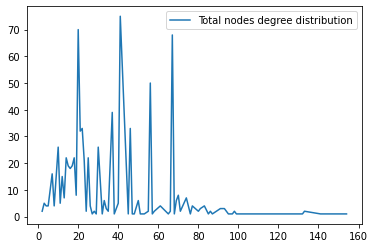

In [13]:
deg_dst_Graph(G_new)

### Random simulated graph for newly generated Bi-partite graph

In [14]:
GT_p = avg_deg_new /(len(G_new.nodes())-1) # caliculating probability
GT_nodes=len(G_new.nodes())
print('Random model probability value',GT_p, 'and length of nodes', GT_nodes)

Random model probability value 0.04698860622385419 and length of nodes 794


In [15]:
GT_sim_rndm = nx.gnp_random_graph(GT_nodes, GT_p)
# Simulated Random 
avg_deg_sim, avg_clstrng_sim =  avg_deg_cc(GT_sim_rndm)

### Isolated Graph

In [16]:
i= nx.number_connected_components(GT_sim_rndm)
i

1

In [17]:
num = 0 
for c in nx.connected_components(GT_sim_rndm):
    num += nx.average_shortest_path_length(GT_sim_rndm.subgraph(c))*len(GT_sim_rndm.subgraph(c))
GT_sim_avg_path = num/len(GT_sim_rndm.nodes())

In [18]:
print("Bi-partite Random Simulated MU Network \n ")
print("Average degree" ,avg_deg_sim)
print("Average path", GT_sim_avg_path)
print("Average clusteirng", avg_clstrng_sim)

Bi-partite Random Simulated MU Network 
 
Average degree 37.52141057934509
Average path 2.113823410763577
Average clusteirng 0.04724413679469155


In [19]:
val1= GT_sim_avg_path/GT_avg_path_new
print(' Average path of Random Model Graph is ',val1,'times the average path of Marvel Universe')
val2 =  avg_clstrng_sim/avg_clstrng_new
print('Clustering co-efficient of Random graph is',val2,'times the Clustering co-efficient of Marvel Uuniverse')
print("Newly generated graph diameter is", max([max(j.values()) for (i,j) in nx.shortest_path_length(GT_sim_rndm)]))

 Average path of Random Model Graph is  0.7113277835105974 times the average path of Marvel Universe
Clustering co-efficient of Random graph is 0.060064397408762335 times the Clustering co-efficient of Marvel Uuniverse
Newly generated graph diameter is 3


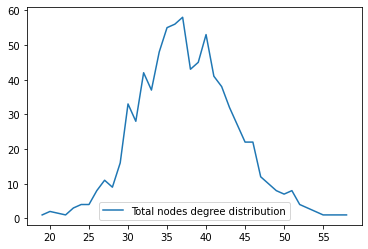

In [20]:
deg_dst_Graph(GT_sim_rndm)

### Prefrential Algorithm Method

In [21]:
new_nodes=list()
new_nodes1 = list(GT.neighbors('Werewolf by Night*'))
for i in new_nodes1: new_nodes.append(i)
new_nodes2= list(GT.neighbors('Moon Knight*'))
for i in new_nodes2: new_nodes.append(i)
new_nodes3= list(GT.neighbors('Eternals*'))
for i in new_nodes3: new_nodes.append(i)
new_nodes4= list(GT.neighbors('Helstrom*'))
for i in new_nodes4: new_nodes.append(i)
new_nodes5 = list(GT.neighbors('Runaways*'))
for i in new_nodes5: new_nodes.append(i)
new_nodes6 = list(GT.neighbors('Cloak & Dagger*'))
for i in new_nodes6: new_nodes.append(i)
print(new_nodes) # Nodes (actors) adding to the base cluster
print(len(new_nodes))

['Jack Russell', 'Elsa Bloodstone', 'Verussa', 'Jovan', 'Azarel', 'Liorn', 'Barasso', 'Billy Swan', 'Ted (The Man-Thing)', 'The Flaming Tuba', 'Ulysses Bloodstone', 'Marc Spector', 'Arthur Harrow', 'Layla El-Faouly', 'Khonshu', 'Bobbi', 'Billy', 'Taweret', 'Selim', 'Crawley', 'Donna', 'Yatzil', 'J.B.', 'Bek', 'Anton Mogart', 'Wendy Spector', 'Sersi', 'Ikaris', 'Thena', 'Ajak', 'Dane Whitman', 'Kingo', 'Sprite', 'Phastos', 'Makkari', 'Druig', 'Gilgamesh', 'Karun', 'Kro', 'Ben', 'Jack', 'Eros', 'Arishem', 'Daimon Helstrom', 'Ana Helstrom', 'Victoria Helstrom', 'Gabriella Rosetti', 'Dr. Louise Hastings', 'Chris Yen', 'Keith Spivey', 'Father Joshua Crow', 'Finn', 'Esther', 'Bryce', 'Officer Derrick Jackson', 'Ellis', 'Jolene Spivey', 'Alex Tilden', 'Archbishop Terrazi', 'Cameron Tate', 'Lee', 'Kthara', 'Papa', 'Aubree Richards', 'Alex Wilder', 'Nico Minoru', 'Karolina Dean', 'Gert Yorkes', 'Chase Stein', 'Molly Hernandez', 'Catherine Wilder', 'Geoffrey Wilder', 'Janet Stein', 'Victor Stein

In [22]:
# Removing 'Moon Knight','Eternals', 'Helstrom', 'Cloak & Dagger' & Runaways' and 'Werewolf by Night' clusters from the main graph
GT_p = GT.copy()
for i in new_nodes: 
    if i in GT_p.nodes(): GT_p.remove_node(i)
GT_p.remove_node('Moon Knight*')
GT_p.remove_node('Eternals*')
GT_p.remove_node('Helstrom*')
GT_p.remove_node('Cloak & Dagger*') 
GT_p.remove_node('Runaways*')
GT_p.remove_node('Werewolf by Night*')
print("Node count in actual MU network",len(GT.nodes()))
print("Removing the nodes including the small clusters titles",len(new_nodes))
print("Node count after removing nodes from the MU network",len(GT_p.nodes()))

Node count in actual MU network 854
Removing the nodes including the small clusters titles 123
Node count after removing nodes from the MU network 727


In [23]:
def PAM(G,avg_deg,new_nodes):
    node_count=len(G.nodes())
    G_PAM = nx.Graph
    G_PAM = G.copy()
    i = node_count-1
    G_node_list = np.array((G.nodes()))
    #node probability
    node_prob =[]
    for n in G.nodes():
        prob = G.degree(n)/(2*len(G.edges()))
        node_prob.append(prob)
#node_prob
    
    for n in range(len(new_nodes)):
        i = np.random.choice(new_nodes)
        G_PAM.add_node(i)
        while (G_PAM.degree(i)!=round(avg_deg)):
            j=np.random.choice(G_node_list, p= node_prob)
            #print(i,j,G_PAM.degree(i))
            G_PAM.add_edge(i,j)
        new_nodes.remove(i) 
        
    return G_PAM

In [24]:
GT_pp = GT.copy()
PAM_MU = PAM(GT_p,avg_deg_new,new_nodes)

In [25]:
avg_deg_PAM, avg_clstrng_PAM = avg_deg_cc(PAM_MU)
PAM_avg_path= nx.average_shortest_path_length(PAM_MU)
print(len(PAM_MU.nodes()), len(PAM_MU.edges()))
print("PAM-MU Bi-partite Graph \n ")
print("Average degree" ,avg_deg_PAM )
print("Average path", PAM_avg_path)
print("Average clusteirng", avg_clstrng_PAM)
print("Bi-partite generated PAM graph diameter is", max([max(j.values()) for (i,j) in nx.shortest_path_length(PAM_MU)]))

848 5496
PAM-MU Bi-partite Graph 
 
Average degree 12.962264150943396
Average path 2.7241457084939076
Average clusteirng 0.03529918827670426
Bi-partite generated PAM graph diameter is 5


In [26]:
val1= PAM_avg_path/GT_avg_path_new
print(' Average path of PAM_MU Graph is ',val1,'times the average path of Marvel Universe')
val2 =  avg_clstrng_PAM/avg_clstrng_new
print('Clustering co-efficient of Random graph is',val2,'times the Clustering co-efficient of Marvel Uuniverse')
print("Newly generated graph diameter is", max([max(j.values()) for (i,j) in nx.shortest_path_length(GT_sim_rndm)]))

 Average path of PAM_MU Graph is  0.9167088030702147 times the average path of Marvel Universe
Clustering co-efficient of Random graph is 0.044878044487774875 times the Clustering co-efficient of Marvel Uuniverse
Newly generated graph diameter is 3


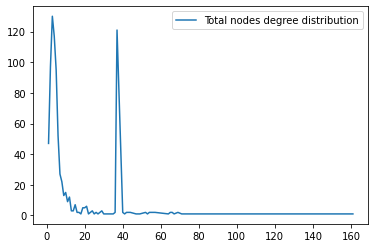

In [27]:
deg_dst_Graph(PAM_MU)